# Patient Data Analysis

Dataset gathered from stroke patients **TODO ADD DETAILS ABOUT STROKE PATIENTS**

<img src="images/ddm_desc.jpeg" width="600">

Here, we use the `hddm` (Python) library$^1$ to model language-based decision making based on response-time & accuracy data from a binary forced-choice decision task. During each trial, subjects were presented with a digital image of an item (visual stimulus) and a verbal description (auditory stimulus). At the end of each trial, subjects were asked to indicate whether the two types of stimuli agreed (i.e. visual and auditory stimulus pointed to the same object) or were different (i.e. non-matching sound and image). Auditory and visual stimuli pairs fell under four distinct categories, as summarised below:  
- Condition 1 (**SS**): Same stimuli (see cat / hear cat)
- Condition 2 (**CP**): Phonologically congruent (see cat / hear hat)
- Condition 3 (**CS**): Semantically congruent (see cat / hear dog)
- Condition 4 (**US**): Unrelated stimuli (see house / hear cat)

In [1]:
"""
Environment setup
"""
%matplotlib inline
%cd ~/Programming/projects/language_decision/
import warnings; warnings.filterwarnings('ignore')
import hddm
import numpy as np
import matplotlib.pyplot as plt

/Users/celefthe/Programming/projects/language_decision


In [2]:
"""
Plot Drift Diffusion Model for patient data
"""

patients = hddm.load_csv('data/patients_clean.csv')

# Test if stimulus type affects drift rate
model = hddm.HDDM(patients, depends_on={'v': 'stim'})
model.find_starting_values()
model.sample(9000, burn=200)

 [-----------------100%-----------------] 9000 of 9000 complete in 270.2 sec

## Convergence Checks

Plotting a
Plotting a_std
Plotting v(CP)
Plotting v(CS)
Plotting v(SS)
Plotting v(US)
Plotting v_std
Plotting t
Plotting t_std


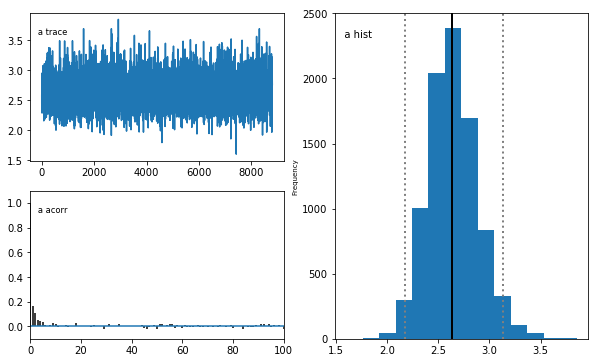

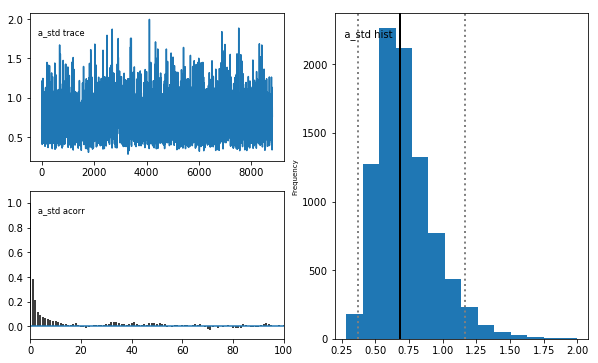

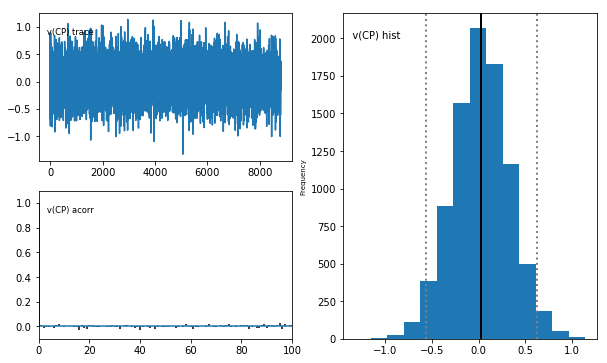

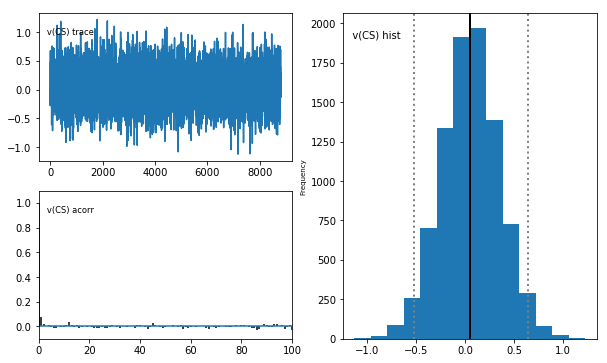

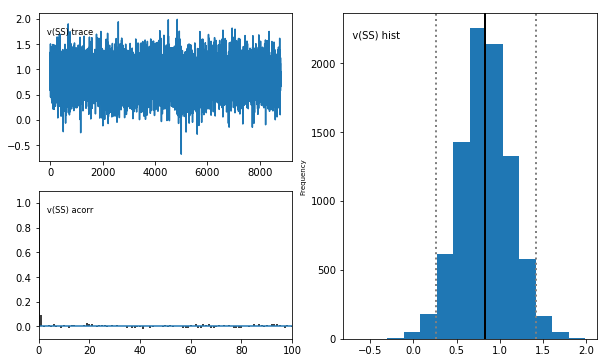

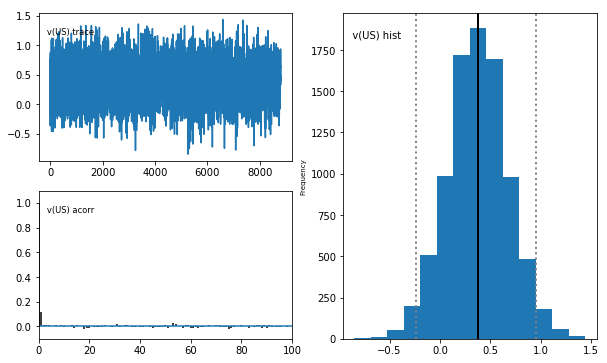

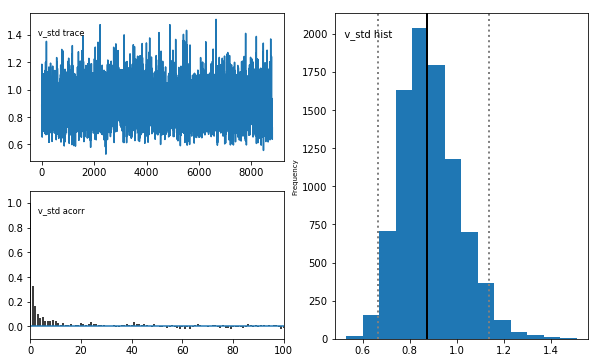

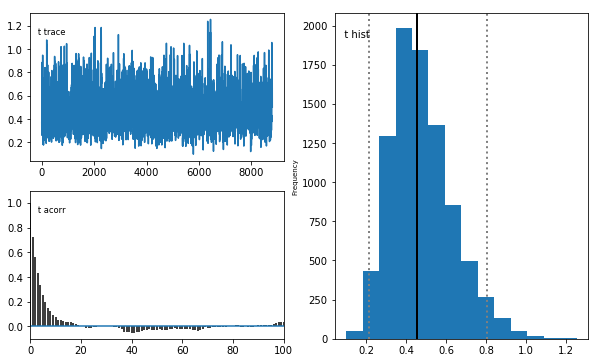

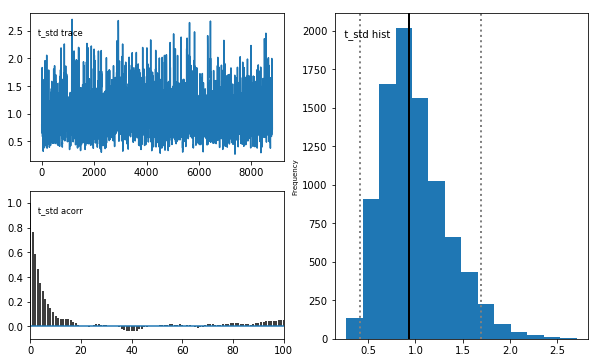

In [3]:
model.plot_posteriors()

**PASS** - No problematic patterns, such as drifts or large jumps, can be in any of the traces above. Autocorrelation also drops to zero quite quickly when considering past samples - which is what we want.

In [ ]:
models = []
for i in range(5):
    m = hddm.HDDM(patients, depends_on={'v': 'stim'})
    m.find_starting_values()
    m.sample(9000, burn=200)
    models.append(m)

gelman_rubin = hddm.analyze.gelman_rubin(models)

for key, value in gelman_rubin.items():
    if (value > 1.02) or (value < 0.98):
        print("Convergence error at " + str(key))
        break
else
    print("\nNo convergence problems detected!")

## Drift Rate Analysis

Here, we examine whether the type of stimulus significantly affects the drift rate of the decision-making process.

In [4]:
model_stats = model.gen_stats()
print("Threshold (a) Mean: " + str(model_stats['mean']['a']) + " (std: " + str(model_stats['std']['a']) + ")")
print("SS Mean Drift Rate: " + str(model_stats['mean']['v(SS)']) + " (std: " + str(model_stats['std']['v(SS)']) + ")")
print("CP Mean Drift Rate: " + str(model_stats['mean']['v(CP)']) + " (std: " + str(model_stats['std']['v(CP)']) + ")")
print("CS Mean Drift Rate: " + str(model_stats['mean']['v(CS)']) + " (std: " + str(model_stats['std']['v(CS)']) + ")")
print("US Mean Drift Rate: " + str(model_stats['mean']['v(US)']) + " (std: " + str(model_stats['std']['v(US)']) + ")")

Threshold (a) Mean: 2.6439453209 (std: 0.242774680704)
SS Mean Drift Rate: 0.835390690595 (std: 0.291547064106)
CP Mean Drift Rate: 0.0261069022004 (std: 0.303181002538)
CS Mean Drift Rate: 0.0544885304734 (std: 0.295549351724)
US Mean Drift Rate: 0.376108396871 (std: 0.300981748649)


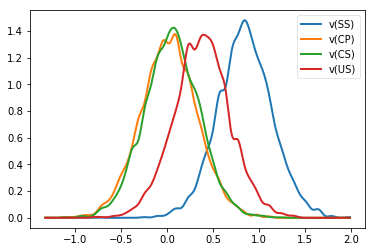

In [5]:
v_SS, v_CP, v_CS, v_US = model.nodes_db.node[['v(SS)', 'v(CP)', 'v(CS)', 'v(US)']]

hddm.analyze.plot_posterior_nodes([v_SS, v_CP, v_CS, v_US])

In [7]:
print('P(SS > US) = ' + str((v_SS.trace() > v_US.trace()).mean()))
print('P(CP > SS) = ' + str((v_CP.trace() > v_SS.trace()).mean()))
print('P(CS > SS) = ' + str((v_CS.trace() > v_SS.trace()).mean()))
print('P(CP > CS) = ' + str((v_CP.trace() > v_CS.trace()).mean()))
print('P(CP > US) = ' + str((v_CP.trace() > v_US.trace()).mean()))
print('P(CS > US) = ' + str((v_CS.trace() > v_US.trace()).mean()))

P(SS > US) = 0.869204545455
P(CP > SS) = 0.0295454545455
P(CS > SS) = 0.0304545454545
P(CP > CS) = 0.469090909091
P(CP > US) = 0.199659090909
P(CS > US) = 0.214886363636


### Reaction Time & Accuracy 

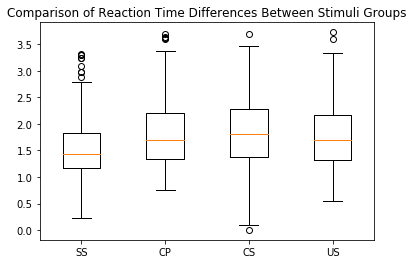

In [9]:
us = patients.loc[patients['stim'] == 'US']
ss = patients.loc[patients['stim'] == 'SS']
cp = patients.loc[patients['stim'] == 'CP']
cs = patients.loc[patients['stim'] == 'CS']

plt.boxplot([ss.rt.values, cp.rt.values, cs.rt.values, us.rt.values], 
            labels=('SS', 'CP', 'CS', 'US'),)
plt.title('Comparison of Reaction Time Differences Between Stimuli Groups')
plt.show()